<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
</figure>
    
# GIS visualisation

This notebook we will work together on making a useful application.

<br>
<br>
<div style="text-align: right"> developed by MAMBA </div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
import seaborn as sns
import xml.etree.ElementTree as ET
#install package containing shapefile with the Anaconda prompt 'conda install pyshp'
import shapefile

In [4]:
# read shapefile with the actual location of the canals
boezem = shapefile.Reader(r"shapefiles\boezemwatergangen.shp")

# read shapefile with the modelled canals
RTCtakken = shapefile.Reader(r"shapefiles\RTC takken voorstel 20160203.shp") 

# read csv file with initial water levels
csv_file = 'timeseries_0000.csv'
 
# read an xml file with the model configuration (node coördinates and their names)
xml_file = 'rtcToolsConfig.xml'
xmlcode = "{http://www.wldelft.nl/fews}" #standard code, created by the software 

sns.set_context(context = "notebook") # plot settings

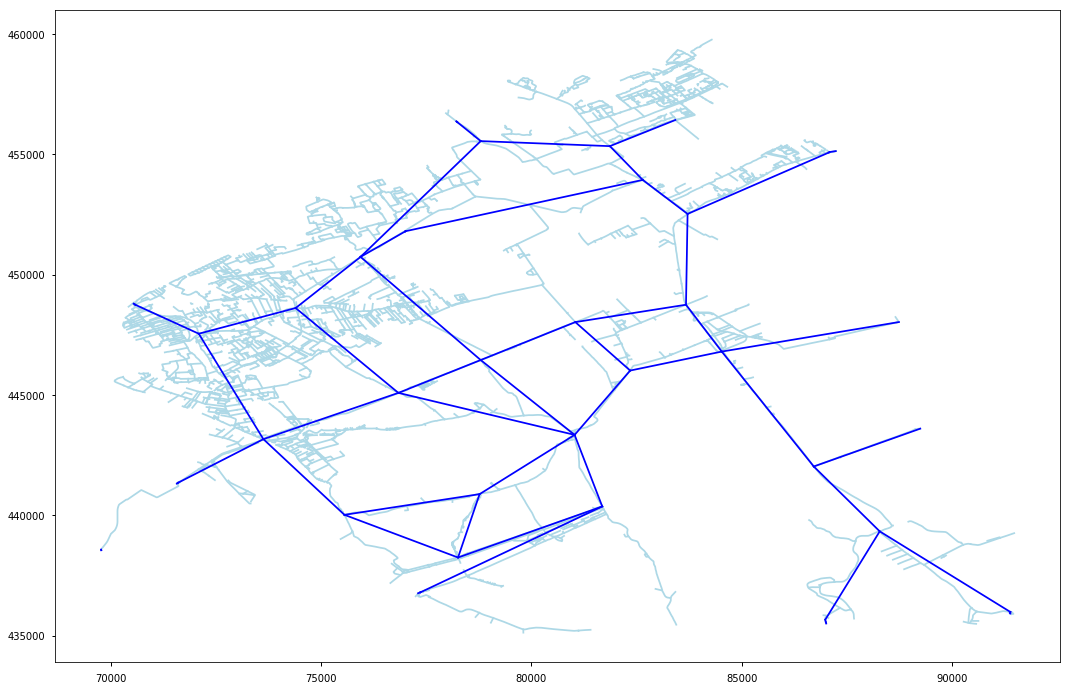

In [4]:
# plot canals (actual and modelled)
fig,ax = plt.subplots(1,figsize = (18,12))

for shp in boezem.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'LightBlue')

for shp in RTCtakken.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'Blue')    
plt.show()

In [21]:
treexy = ET.parse(xml_file)

names = []
x = []
y = []

for i in treexy.iter(xmlcode + 'node'):
    x.append(float(i.attrib['x']))
    y.append(float(i.attrib['y']))
    names.append(i.attrib['id'])
    
dfxy = pd.DataFrame(index = names)
dfxy['x'] = x
dfxy['y'] = y

dfxy.head()



,x,y
N1,71538.62,441142.57
N4,70545.79,448791.50
N5,70590.09,448741.04
N7,71573.05,441316.86
N8,71606.43,441355.23


In [25]:
# read node x,y coördinates from xml file
treexy = ET.parse(xml_file)

names = []
x = []
y = []
for i in treexy.iter(xmlcode + 'node'):
    x.append(float(i.attrib['x']))
    y.append(float(i.attrib['y']))  
    names.append(i.attrib['id'])

dfxy = pd.DataFrame(index = names)
dfxy['x'] = x
dfxy['y'] = y
dfxy.head()


ax.plot(dfxy['x'], dfxy['y']);


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


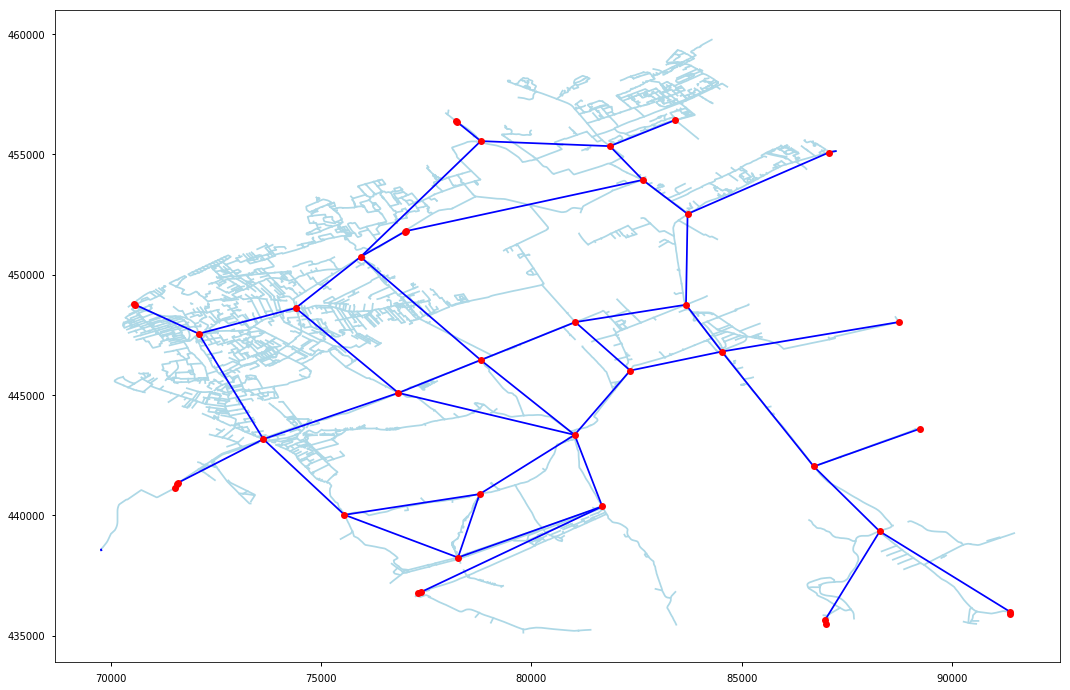

In [6]:
# plot nodes with canals
fig , ax = plt.subplots( 1, figsize = (18,12) )  

for shp in boezem.shapes(): #voor snellere resultaten, comment deze shapefile weg. 
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'LightBlue')

for shp in RTCtakken.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'Blue')    

ax.plot(dfxy.x.values, dfxy.y.values, 'o', color = 'r')  

plt.show()       

In [28]:
measurements = pd.read_csv(csv_file)

initial_wl = []

for name in dfxy.index.values:
    initial_wl.append(measurements["{}_HRTC".format(name)].iloc[-1])
    
dfxy['ini_wl'] = initial_wl

In [7]:
# read water levels from csv file
results = pd.read_csv(csv_file)

initial_wl = []
for name in dfxy.index.values:
    initial_wl.append(results["{}_HRTC".format(name)].iloc[-1]) #.iloc geeft de index location

dfxy['ini_wl'] = initial_wl

dfxy.head()

,x,y,ini_wl
N1,71538.62,441142.57,-0.360
N4,70545.79,448791.50,-0.360
N5,70590.09,448741.04,-0.480
N7,71573.05,441316.86,-0.360
N8,71606.43,441355.23,-0.469


In [ ]:
# plot canals, nodes and waterlevels

fig,ax = plt.subplots(1,figsize = (18,12))

for shp in boezem.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'LightBlue')

for shp in RTCtakken.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'Blue')    
    
ax.plot(dfxy.x, dfxy.y, 'o', color = 'r')  

for k in range(0,len(dfxy.index.values)):
    ax.annotate(dfxy.index[k] + "\n H: "+ "{0:.2f}".format(dfxy.ini_wl[k]), 
                            (dfxy.x[k], dfxy.y[k]), 
                            xycoords="data", xytext=(8, -4), textcoords='offset points', ha='left', va='top',  fontsize=11, backgroundcolor='white',alpha=.9)

plt.show()